Task 1: The "Impossible Physics" Check (Data Cleaning) 🧹
In real-world data, sometimes sensors fail. A diamond has 3 dimensions: x (length), y (width), and z (depth).

Your Mission:

Check the "Summary Statistics" (describe()) for x, y, and z.

Look at the Min value for these columns.

Critical Question: Can a real diamond have a length of 0?

Action: Filter the dataframe to show me these "Ghost Diamonds" (where x, y, or z is 0). How many are there?

Task 2: The Price Curve (Univariate Analysis) 📉
Money usually follows a "Power Law" (Pareto distribution), not a Normal distribution.

Your Mission:

Plot a Histogram (sns.histplot) of the price.

Use bins=50 to see detail.

Question: Are there more cheap diamonds or expensive diamonds? Is the tail on the left or right?

Task 3: The "Exponential" Trap (Bivariate Analysis) 🚀
We assume "Bigger = More Expensive." But is it a straight line?

Your Mission:

Create a Scatterplot: X=carat, Y=price.

Question: Look at the shape.

Is it a straight line (Linear)?

Or does it curve upwards like a rocket (Exponential)?

Hint: Does a 2-carat diamond cost twice as much as a 1-carat, or four times as much?

Task 4: The Paradox (Multivariate - The 30 LPA Question) 🤯
This is a famous statistical trap called Simpson's Paradox.

Your Mission:

Find the average price of "Fair" cut diamonds vs "Ideal" cut diamonds. (Use groupby).

Expectation: Ideal should be more expensive, right?

The Shock: You will likely find that "Fair" (worst cut) diamonds are more expensive on average than "Ideal" ones.

The Investigation: Why? Compare the average Carat size of "Fair" vs "Ideal".

Hypothesis: Are "Fair" diamonds usually giant rocks, while "Ideal" ones are tiny?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
len(df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)])

20

In [14]:
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

In [15]:
len(df)

53920

<Axes: xlabel='price', ylabel='Count'>

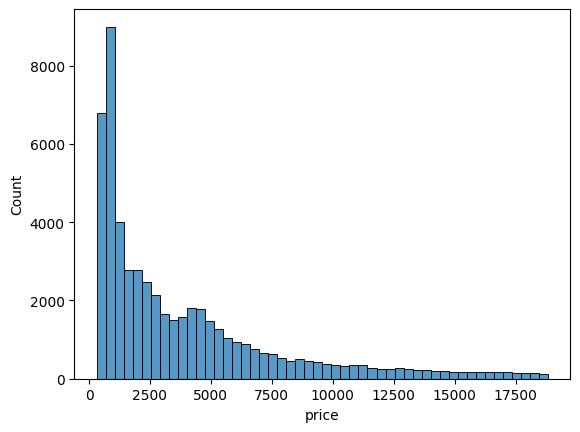

In [17]:
sns.histplot(data=df,bins=50,x='price')

<Axes: xlabel='carat', ylabel='price'>

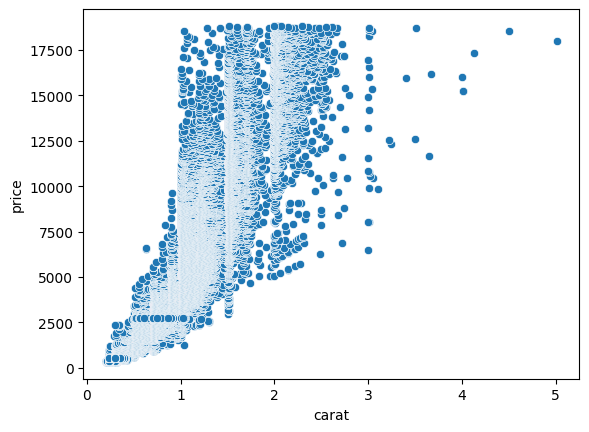

In [18]:
sns.scatterplot(data=df,x='carat',y='price')

In [19]:
df.groupby('cut')['price'].mean()

C:\Users\raghu\AppData\Local\Temp\ipykernel_39200\3177101055.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cut')['price'].mean()


cut
Ideal        3456.941201
Premium      4579.684543
Very Good    3981.664101
Good         3926.403509
Fair         4357.500932
Name: price, dtype: float64

In [20]:
df.groupby('cut')['carat'].mean()

C:\Users\raghu\AppData\Local\Temp\ipykernel_39200\513079693.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cut')['carat'].mean()


cut
Ideal        0.702759
Premium      0.891409
Very Good    0.806365
Good         0.848711
Fair         1.046078
Name: carat, dtype: float64

<Axes: xlabel='cut', ylabel='price'>

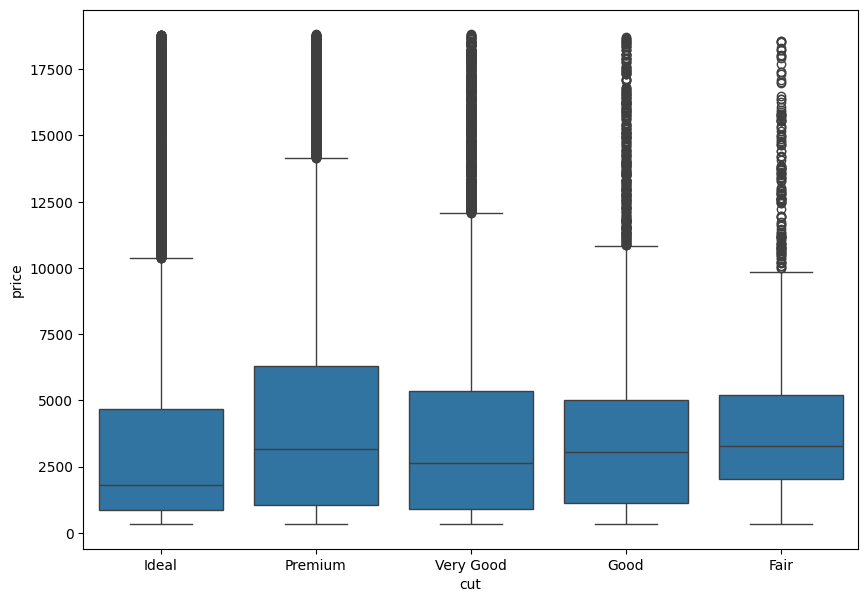

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='cut',y='price')

<Axes: xlabel='cut', ylabel='price'>

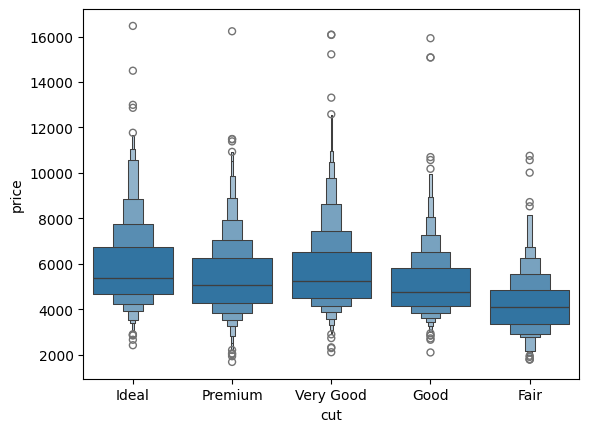

In [25]:
one_carat = df[(df['carat'] >= 0.99) & (df['carat'] <= 1.01)]
sns.boxplot(data=one_carat,x='cut',y='price')

<Axes: >

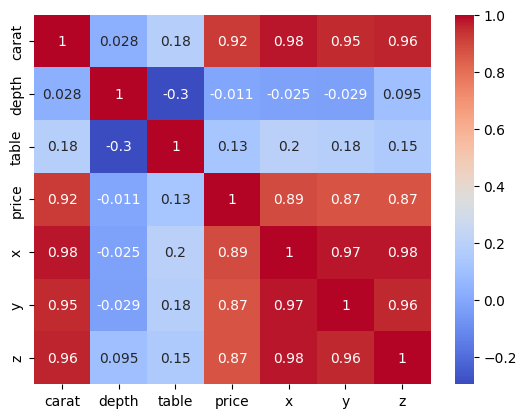

In [31]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: >

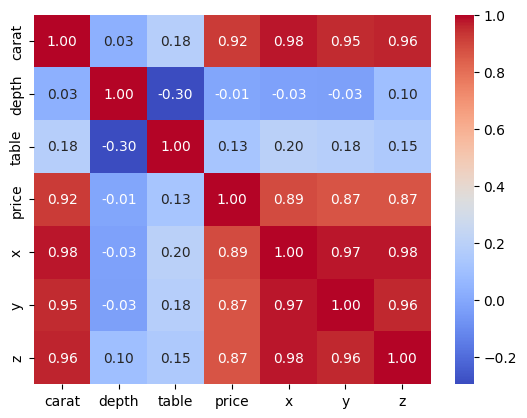

In [33]:
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
df['cut_score'] = df['cut'].map(cut_mapping)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")